In [1]:
import pandas as pd
import numpy as np
import wrangle
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import explained_variance_score

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('iris.csv')

In [3]:
type(df)

pandas.core.frame.DataFrame

In [4]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [7]:
df.petal_length

0      1.4
1      1.4
2      1.3
3      1.5
4      1.4
      ... 
145    5.2
146    5.0
147    5.2
148    5.4
149    5.1
Name: petal_length, Length: 150, dtype: float64

In [9]:
X_train, y_train, X_validate, y_validate, X_test, y_test = wrangle.train_validate_test(df,'petal_length')

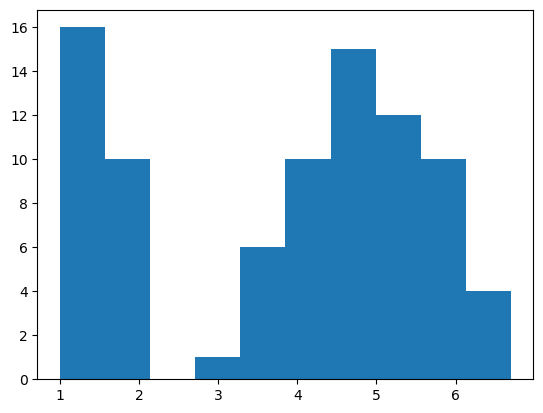

In [11]:
plt.hist(y_train)
plt.show()

In [20]:
pl_pred_mean = y_train['pl'].mean()
y_train['pl'] = pl_pred_mean
y_validate['pl'] = pl_pred_mean

pl_pred_median = y_train['pl'].median()
y_train['pl'] = pl_pred_median
y_validate['pl'] = pl_pred_median

rmse_train = mean_squared_error(y_train.pl, y_train.pl_pred_mean)**(1/2)
rmse_validate = mean_squared_error(y_validate.pl, y_validate.pl_pred_mean)**(1/2)

print("RMSE using Mean\nTrain/In-Sample: ", round(rmse_train, 2), 
      "\nValidate/Out-of-Sample: ", round(rmse_validate, 2))

rmse_train = mean_squared_error(y_train.pl, y_train.pl_pred_median)**(1/2)
rmse_validate = mean_squared_error(y_validate.pl, y_validate.pl_pred_median)**(1/2)

print("RMSE using Median\nTrain/In-Sample: ", round(rmse_train, 2), 
      "\nValidate/Out-of-Sample: ", round(rmse_validate, 2))

KeyError: 'pl'

In [21]:
lm = LinearRegression(normalize=True)

lm.fit(X_train, y_train.pl)

y_train['pl_pred_lm'] = lm.predict(X_train)

rmse_train = mean_squared_error(y_train.pl, y_train.pl_pred_lm)**(1/2)

y_validate['pl_pred_lm'] = lm.predict(X_validate)

rmse_validate = mean_squared_error(y_validate.pl, y_validate.pl_pred_lm)**(1/2)

print("RMSE for OLS using LinearRegression\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

AttributeError: 'Series' object has no attribute 'pl'

In [22]:
lars = LassoLars(alpha=1.0)

lars.fit(X_train, y_train.pl)

y_train['pl_pred_lars'] = lars.predict(X_train)


y_validate['pl_pred_lars'] = lars.predict(X_validate)

rmse_validate = mean_squared_error(y_validate.pl, y_validate.pl_pred_lars)**(1/2)

print("RMSE for Lasso + Lars\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

AttributeError: 'Series' object has no attribute 'pl'

In [23]:
glm = TweedieRegressor(power=1, alpha=0)

glm.fit(X_train, y_train.pl)

y_train['pl_pred_glm'] = glm.predict(X_train)

rmse_train = mean_squared_error(y_train.pl, y_train.pl_pred_glm)**(1/2)

y_validate['pl_pred_glm'] = glm.predict(X_validate)

rmse_validate = mean_squared_error(y_validate.pl, y_validate.pl_pred_glm)**(1/2)

print("RMSE for GLM using Tweedie, power=1 & alpha=0\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)


AttributeError: 'Series' object has no attribute 'pl'